In [66]:
import pandas as pd
import json
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
%matplotlib inline
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

Get the scraped data and clean the data

In [3]:
with open('/Users/qinjiale/PycharmProjects/BIA-660/Assignment_03/reviews.json') as data_file:
    data = json.load(data_file)

In [4]:
df = pd.read_json(data)

In [5]:
df.head()

,Comment,CustomerName,Date,Headline,Pattern,Rating,TextReview
0,One person found this helpful. Was this review...,Alexander Cable,2018-04-17,It isn't very bright but it's small and will e...,Pattern: LED Flashlight 2P,5.0 out of 5 stars,It isn't very bright but it's small and will e...
1,One person found this helpful. Was this review...,Courtney,2018-04-16,"Bright, but eats batteries",Pattern: LED Flashlight 2P,5.0 out of 5 stars,"Very bright, I work in a run down steel mill a..."
2,Was this review helpful to you?,GREGORY TEEUWEN,2018-04-16,They work pretty good. Didn't blow me away,Pattern: LED Flashlight 2P,4.0 out of 5 stars,"They work pretty good. Didn't blow me away, an..."
3,Was this review helpful to you?,Blaqirishman,2018-04-16,Four Stars,Pattern: LED Flashlight 2P,4.0 out of 5 stars,"I will only say for now so far so good, will s..."
4,Was this review helpful to you?,Scott,2018-04-16,Five Stars,Pattern: LED Flashlight 2P,5.0 out of 5 stars,"Great little flashlight, very bright, will buy..."


In [6]:
print(df.iloc[0].TextReview)

It isn't very bright but it's small and will easily fit in a pocket. If you use and loose flash lights a lot these are perfect.


The text reviews are clean, which can be directly used in EDA. Now, change the comment and Rating into numerical data.

In [7]:
for i in range(len(df.index)):
    df.set_value(i,'Rating',float(df.iloc[i].Rating.split(' ')[0]))
print (df.iloc[0].Rating)


5.0


In [8]:
for i in range(len(df.index)):
    if df.iloc[i].Comment.split(' ')[0] == 'One':
        df.set_value(i,'Comment', 1)
    elif df.iloc[i].Comment.split(' ')[0] == 'Was':
        df.set_value(i,'Comment', 0)
    else:
        df.set_value(i,'Comment', int(df.iloc[i].Comment.split(' ')[0]))
print (df.iloc[0:5].Comment)

0    1
1    1
2    0
3    0
4    0
Name: Comment, dtype: object


In [9]:
df.head()

,Comment,CustomerName,Date,Headline,Pattern,Rating,TextReview
0,1,Alexander Cable,2018-04-17,It isn't very bright but it's small and will e...,Pattern: LED Flashlight 2P,5,It isn't very bright but it's small and will e...
1,1,Courtney,2018-04-16,"Bright, but eats batteries",Pattern: LED Flashlight 2P,5,"Very bright, I work in a run down steel mill a..."
2,0,GREGORY TEEUWEN,2018-04-16,They work pretty good. Didn't blow me away,Pattern: LED Flashlight 2P,4,"They work pretty good. Didn't blow me away, an..."
3,0,Blaqirishman,2018-04-16,Four Stars,Pattern: LED Flashlight 2P,4,"I will only say for now so far so good, will s..."
4,0,Scott,2018-04-16,Five Stars,Pattern: LED Flashlight 2P,5,"Great little flashlight, very bright, will buy..."


In [10]:
cleaned_review = df.loc[:,  'TextReview']

#### EDA

Goal: Use selected features in the review data to predict the rating.  

There are 7 attributes for each review in the original dataset:  
Comment: the number means the number of people who think this review is helpful  
CustomerName: the name of the reviewers' Amazon account  
Data: the date of uploading the review. They are from 2017 to now.  
Headline: The headline of this review . 
Pattern: the pattern of the product the reviewer bought. There are three kinds of pattern:2P, 4packs and 6packs   
Rating: The rating number given by reviewers    
TextReviews: The text comments wrriten by the reviewers


Then, I try to check if the data is intuitive. And generally find out the relationship between rating and each features.

In [11]:
pd.value_counts(df.Rating)

5.0    549
4.0    118
1.0     81
3.0     53
2.0     52
Name: Rating, dtype: int64

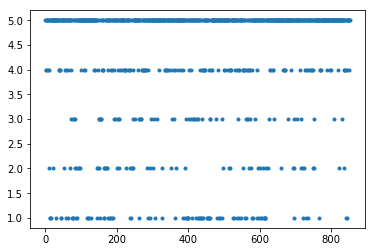

In [52]:
pyplot.plot(df.Rating, '.')

(array([  81.,    0.,   52.,    0.,    0.,   53.,    0.,  118.,    0.,  549.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

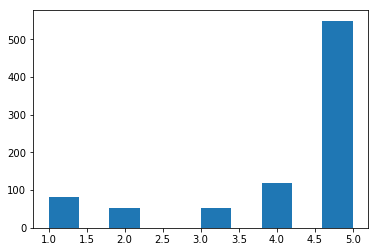

In [53]:
pyplot.hist(df.Rating)

From the counting, we can see more than half of the reviews has reating of 5. The distribution of rating is not uniform. It should be take into consideration when I choose the traning set.

In [56]:
pd.value_counts(df.Comment)

0      702
1       86
2       27
3       22
4        7
6        3
5        3
218      1
16       1
8        1
Name: Comment, dtype: int64

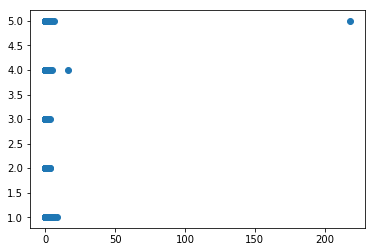

In [57]:
pyplot.scatter(df.Comment, df.Rating)

In [58]:
Comment_Rating = df[df.Comment != 0]
Comment_Rating = Comment_Rating.loc[:, ['Comment', 'Rating']]
Comment_Rating.head()

,Comment,Rating
0,1,5
1,1,5
27,1,5
41,1,4
60,1,5


In [59]:
pd.value_counts(Comment_Rating.Rating)

5.0    66
1.0    61
4.0    11
2.0     8
3.0     5
Name: Rating, dtype: int64

(array([ 61.,   0.,   8.,   0.,   0.,   5.,   0.,  11.,   0.,  66.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

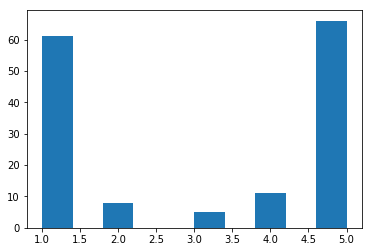

In [45]:
pyplot.hist(Comment_Rating.Rating)

As for the helpful comment number, nearly 90% of the reviews have no comment. In the rest, except one review has 218 helpful comments, none of the others have comments more than 10. But from the rating dtribution of the commented reviews, we can see the most helpful reviews are the reviews make a rating of 1 or 5. This information may be useful for judging the credibility of the review.

In [64]:
pd.value_counts(df.CustomerName).head(15)

Amazon Customer      88
Chris                 4
Eric                  4
Mike                  3
Cliente de Amazon     3
B                     2
Andrew                2
george                2
John                  2
Aaron                 2
Matthew               2
Heather               2
Robert                2
Dan                   2
Happy                 2
Name: CustomerName, dtype: int64

In [47]:
Customer_Rating = df[df.CustomerName == 'Amazon Customer']
Customer_Rating = Customer_Rating.loc[:, ['CustomerName', 'Rating']]
Customer_Rating.head()

,CustomerName,Rating
12,Amazon Customer,1
16,Amazon Customer,1
18,Amazon Customer,5
31,Amazon Customer,1
41,Amazon Customer,4


In [48]:
pd.value_counts(Customer_Rating.Rating)

5.0    57
4.0    12
1.0    11
3.0     4
2.0     4
Name: Rating, dtype: int64

This time, I checked the customer name. Except the 'Amazon Customer' (it maybe the default name for anonymous customers), most of them only have one review. 

Choosing the training set and test set

In [75]:
Rating1 = df[df.Rating == 1]
Rating1 = Rating1.loc[:, ['TextReview', 'Rating']]
X_train1, X_test1, y_train1, y_test1 = train_test_split(Rating1['TextReview'], Rating1['Rating'], test_size = 0.3, random_state = 0)

In [88]:
Rating2 = df[df.Rating == 2]
Rating2 = Rating2.loc[:, ['TextReview', 'Rating']]
X_train2, X_test2, y_train2, y_test2 = train_test_split(Rating2['TextReview'], Rating2['Rating'], test_size = 0.3, random_state = 0)

In [89]:
Rating3 = df[df.Rating == 3]
Rating3 = Rating3.loc[:, ['TextReview', 'Rating']]
X_train3, X_test3, y_train3, y_test3 = train_test_split(Rating3['TextReview'], Rating3['Rating'], test_size = 0.3, random_state = 0)

In [90]:
Rating4 = df[df.Rating == 4]
Rating4 = Rating4.loc[:, ['TextReview', 'Rating']]
X_train4, X_test4, y_train4, y_test4 = train_test_split(Rating4['TextReview'], Rating4['Rating'], test_size = 0.3, random_state = 0)

In [91]:
Rating5 = df[df.Rating == 5]
Rating5 = Rating5.loc[:, ['TextReview', 'Rating']]
X_train5, X_test5, y_train5, y_test5 = train_test_split(Rating5['TextReview'], Rating5['Rating'], test_size = 0.3, random_state = 0)

In [97]:
X_train = X_train1.append(X_train2)
X_train = X_train.append(X_train3)
X_train = X_train.append(X_train4)
X_train = X_train.append(X_train5)

In [98]:
len(X_train.index)

595

In [138]:
X_test = X_test1.append(X_test2)
X_test = X_test.append(X_test3)
X_test = X_test.append(X_test4)
X_test = X_test.append(X_test5)

In [99]:
y_train = y_train1.append(y_train2)
y_train = y_train.append(y_train3)
y_train = y_train.append(y_train4)
y_train = y_train.append(y_train5)

In [100]:
len(y_train.index)

595

In [135]:
y_train=y_train.astype('int')

In [139]:
y_test = y_test1.append(y_test2)
y_test = y_test.append(y_test3)
y_test = y_test.append(y_test4)
y_test = y_test.append(y_test5)

In [140]:
y_test=y_test.astype('int')

Find Bags-of-words

In [101]:
cv = CountVectorizer(lowercase=True, stop_words='english')

In [102]:
vect = cv.fit(X_train)

In [103]:
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [105]:
feature_name = vect.get_feature_names()

In [106]:
len(feature_name)

1846

There are too many features. Try to find some useless words.

In [116]:
nlp = spacy.load('en')

In [117]:
def noun_adj_verb_filter(sentences):
    preprocessed_sentences = []
    keep_types = {'NOUN', 'PROPN', 'ADJ', 'VERB'}
    
    for sentence in sentences:
        doc = nlp(sentence)
        
        keep_tokens_string = ' '.join([t.text for t in doc if t.pos_ in keep_types])
        preprocessed_sentences.append(keep_tokens_string)
    
    return preprocessed_sentences

In [118]:
navf = noun_adj_verb_filter(X_train)

In [121]:
cv = CountVectorizer(lowercase=True, stop_words='english',max_features=20)
vect = cv.fit_transform(navf)
print(vect.toarray())
cv.get_feature_names()

[[0 0 1 ..., 0 0 0]
 [0 0 0 ..., 1 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


['aa',
 'batteries',
 'battery',
 'bright',
 'clip',
 'flashlight',
 'flashlights',
 'good',
 'great',
 'light',
 'lights',
 'little',
 'love',
 'pocket',
 'price',
 'product',
 'size',
 'small',
 'use',
 'work']

Find some stop words in the most frequecy words

In [125]:
stop_words = {'aa', 'flashlight', 'light', 'product', 'use'}

In [126]:
def noun_adj_verb_filter(sentences, stop_words=None):
    preprocessed_sentences = []
    keep_types = {'NOUN', 'PROPN', 'ADJ', 'VERB'}
    
    for sentence in sentences:
        doc = nlp(sentence)
        
        if stop_words is not None:
            keep_tokens_string = ' '.join([t.lemma_ for t in doc if t.pos_ in keep_types and t.lemma_ not in stop_words])
        else:
            keep_tokens_string = ' '.join([t.lemma_ for t in doc if t.pos_ in keep_types])
        preprocessed_sentences.append(keep_tokens_string)
    
    return preprocessed_sentences

In [127]:
navf = noun_adj_verb_filter(X_train)

In [132]:
cv = CountVectorizer(lowercase=True, stop_words='english',max_features=20)
X_train_vect = cv.fit_transform(navf)
print(X_train_vect.toarray())
cv.get_feature_names()

[[1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


['battery',
 'bright',
 'buy',
 'clip',
 'flashlight',
 'good',
 'great',
 'light',
 'little',
 'love',
 'mode',
 'price',
 'product',
 'pron',
 'size',
 'small',
 'time',
 'turn',
 'use',
 'work']

Build the model

In [129]:
from sklearn.linear_model import LogisticRegression

In [131]:
model = LogisticRegression()

In [136]:
model.fit(X_train_vect, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [137]:
from sklearn.metrics import roc_auc_score

In [142]:
navf_test = noun_adj_verb_filter(X_test)

In [143]:
X_test_vect = cv.fit_transform(navf_test)

In [144]:
predictions = model.predict(X_test_vect)

In [148]:
model.score(X_test_vect, y_test)

0.63565891472868219

In [149]:
model.score(X_train_vect, y_train)

0.67226890756302526

In [151]:
from sklearn.metrics import confusion_matrix

In [153]:
conf_matrix = confusion_matrix(y_train, model.predict(X_train_vect))

In [154]:
conf_matrix

array([[ 10,   2,   0,   2,  42],
       [  7,   4,   0,   0,  25],
       [  3,   1,   1,   3,  29],
       [  1,   0,   2,   8,  71],
       [  3,   2,   0,   2, 377]])